# Modele generatywne w zastosowaniach obrazu 2D i 3D

### Plan opracowania
1. Wprowadzenie do modeli generatywnych
2. Zadanie generowania i dogenerowywania fragmentów obrazów
3. Modele generatywne w grafice 2D
4. Modele generatywne w grafice 3D

## Modele Generatywne

### Definicja
> Generative AI models can take inputs such as text, image, audio, video, and code and generate new content into any of the modalities mentioned. \
> For example, it can turn text inputs into an image, turn an image into a song, or turn video into text. \
> -- <cite>[Nvidia](https://www.nvidia.com/en-us/glossary/generative-ai/#:~:text=Generative%20AI%20models%20can%20take,or%20turn%20video%20into%20text.)</cite>

Modele generatywne to rodzaj algorytmów uczenia maszynowego, które uczą się generować nowe dane na wzór danych treningowych. \
W przeciwieństwie do modeli dyskryminacyjnych, które klasyfikują lub przewidują wartości, modele generatywne są zaprojektowane do tworzenia nowych przykładów.

### Rodzaje modeli generatywnych
#### Generative Adversarial Networks (GANs) (2)

![GANs](./images/gan_diagram.svg)
Źródło: [Google Developers](https://developers.google.com/machine-learning/gan/gan_structure?hl=pl)

Modele te składają się z dwóch sieci neuronowych:
- Generator: Tworzy nowe dane.
- Dyskryminator: Rozróżnia dane prawdziwe (z danych treningowych) od wygenerowanych (przez generator).

Trening GAN polega na „grze” między generatorem i dyskryminatorem:
- Celem generatora jest wyprodukowanie danych, które są trudne do odróżnienia od prawdziwych.
- Celem dyskryminatora jest rozróżnienie prawdziwych danych od wygenerowanych.

Po odpowiednim treningu generator produkuje dane, które są trudne do odróżnienia od prawdziwych.

#### Variational Autoencoders (VAEs) (3,4)
VAE są modelami generatywnymi wykorzystywanymi do generowania nowych danych w formie wariacji danych wejściowych, na których zostały wytrenowane.


VAE składają się z dwóch sieci neuronowych:
- Encoder: Mapuje dane wejściowe na przestrzeń latentną.
- Decoder: Mapuje dane z przestrzeni latentnej na dane wyjściowe.


### Modele dyfuzyjne (5)
Modele dyfuzyjne to generatywne modele, które uczą się odtwarzać dane, odwracając proces stopniowego dodawania szumu do danych (proces dyfuzji).

Proces uczenia modelu dyfuzyjnego składa się z dwóch etapów:
- Proces do przodu: Stopniowe dodawanie szumu do danych aż do ich pełnego zaszumienia (losowy szum).
- Proces odwrotny: Odszumianie krok po kroku przy użyciu modelu (np. UNet), aby odzyskać pierwotne dane.

Model jest trenowany na rzeczywistych danych, optymalizując różnicę między zaszumionymi danymi a ich rekonstrukcją - uczy się przewidywać rozkład danych na każdym etapie procesu.

## Zadanie generowania i dogenerowywania obszarów

### Image inpainting

Image inpainting to technika w obszarze przetwarzania obrazów, której celem jest uzupełnianie brakujących fragmentów obrazu lub usuwanie niepożądanych elementów w sposób, który jest wizualnie spójny z otoczeniem.

Proces inpaintingu opiera się na analizie dostępnych informacji w obrazie (np. kolorów, tekstur, krawędzi) i ich wykorzystaniu do uzupełnienia brakujących obszarów.

#### Podstawowe kroki inpaintingu:
1. Zidentyfikowanie brakujących obszarów: Oznaczenie fragmentów obrazu, które wymagają rekonstrukcji (np. maskowanie uszkodzonych miejsc).
2. Analiza kontekstu: Algorytm bada otaczające obszary w celu zrozumienia wzorców, które mają zostać uzupełnione.
3. Uzupełnianie braków: Wykorzystanie technik interpolacji, kopiowania pikseli, syntezy tekstur lub generatywnego modelowania, aby uzupełnić brakujące miejsca.


#### Klasyczne metody inpaintingu:
- Interpolacja: Uzupełnianie brakujących obszarów na podstawie sąsiednich pikseli.
- Kopiowanie pikseli: Kopiowanie pikseli z obszarów referencyjnych.

In [ ]:
%pip install opencv-python matplotlib

#### Import niezbędnych bibliotek

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def display_images(original, mask, result, title):
    plt.figure(figsize=(20, 5))
    plt.suptitle(title)

    plt.subplot(1, 4, 1)
    plt.title("Oryginalny obraz")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Maska")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Obraz z maską")
    masked = original.copy()
    masked[mask == 255] = [255, 255, 255]
    plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Odtworzony obraz")
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


In [51]:
def ordinary_inpainting(original, mask):
    return  cv2.inpaint(original, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [52]:
original_image = cv2.imread('images/inpainting_04.jpg')

image_center = (original_image.shape[1] // 2, original_image.shape[0] // 2)
mask_size = (original_image.shape[1] // 4, original_image.shape[0] // 4)

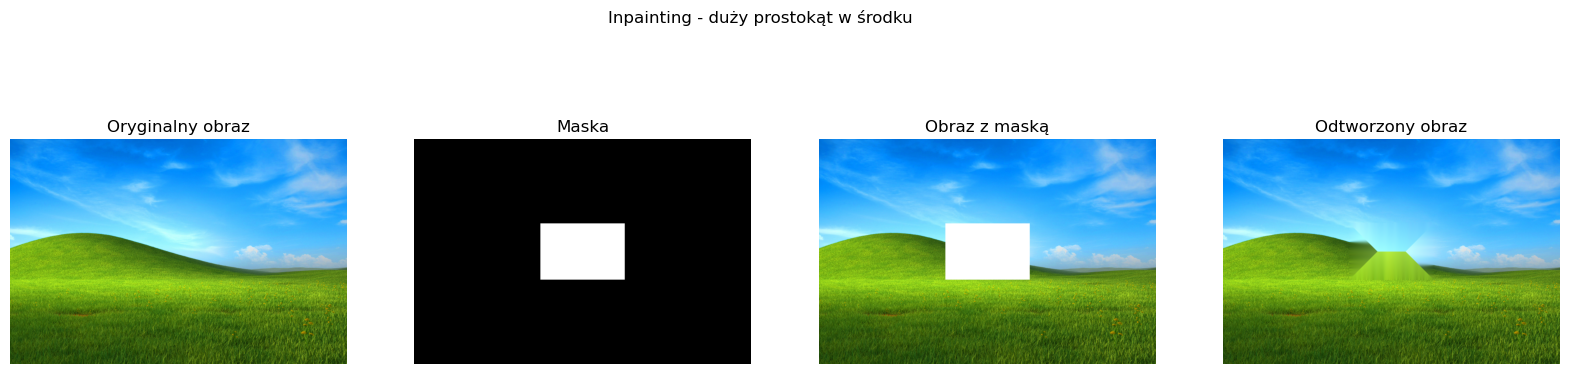

In [69]:
big_rectangle_mask_in_the_middle = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_in_the_middle, (image_center[0] - mask_size[0] // 2, image_center[1] - mask_size[1] // 2),
              (image_center[0] + mask_size[0] // 2, image_center[1] + mask_size[1] // 2), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_in_the_middle)
display_images(original_image, big_rectangle_mask_in_the_middle, inpaint, "Inpainting - duży prostokąt w środku")

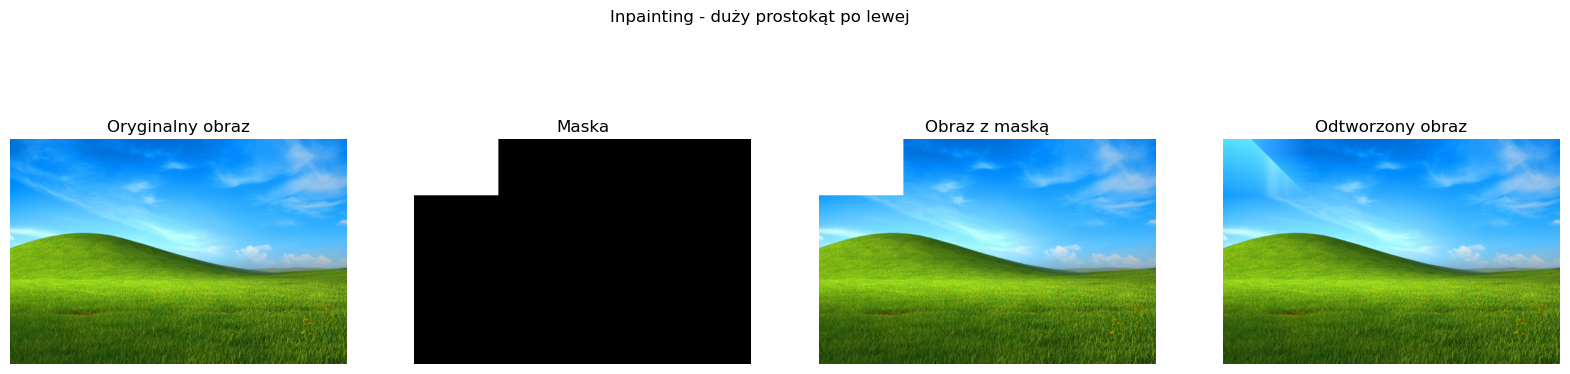

In [70]:
big_rectangle_mask_to_the_left = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_to_the_left, (0, 0), (mask_size[0], mask_size[1]), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_to_the_left)
display_images(original_image, big_rectangle_mask_to_the_left, inpaint, "Inpainting - duży prostokąt po lewej")

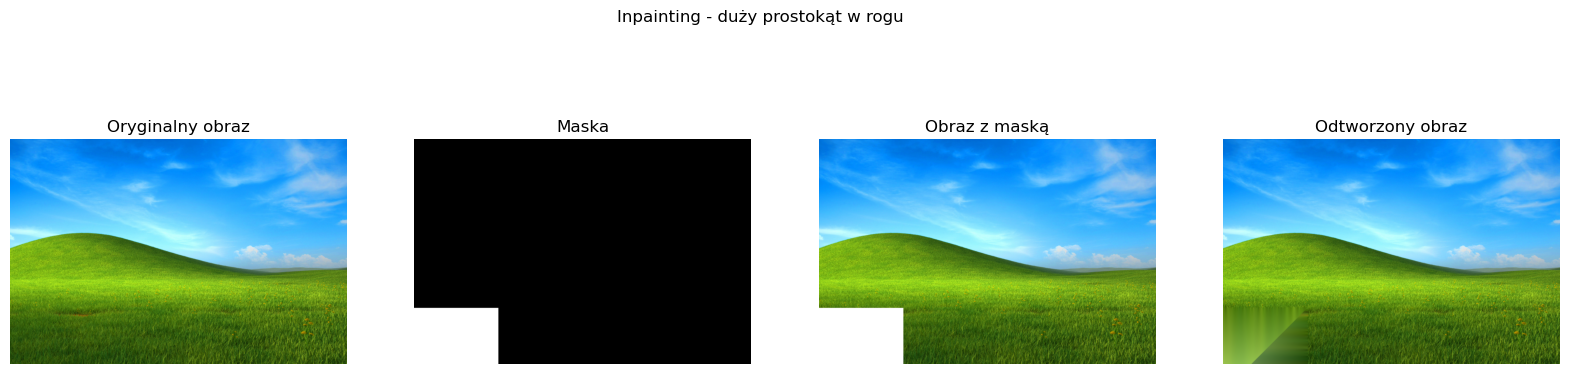

In [74]:
big_rectangle_mask_in_the_corner = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_in_the_corner, (0, original_image.shape[0] - mask_size[1]), 
                (mask_size[0], original_image.shape[0]), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_in_the_corner)
display_images(original_image, big_rectangle_mask_in_the_corner, inpaint, "Inpainting - duży prostokąt w rogu")

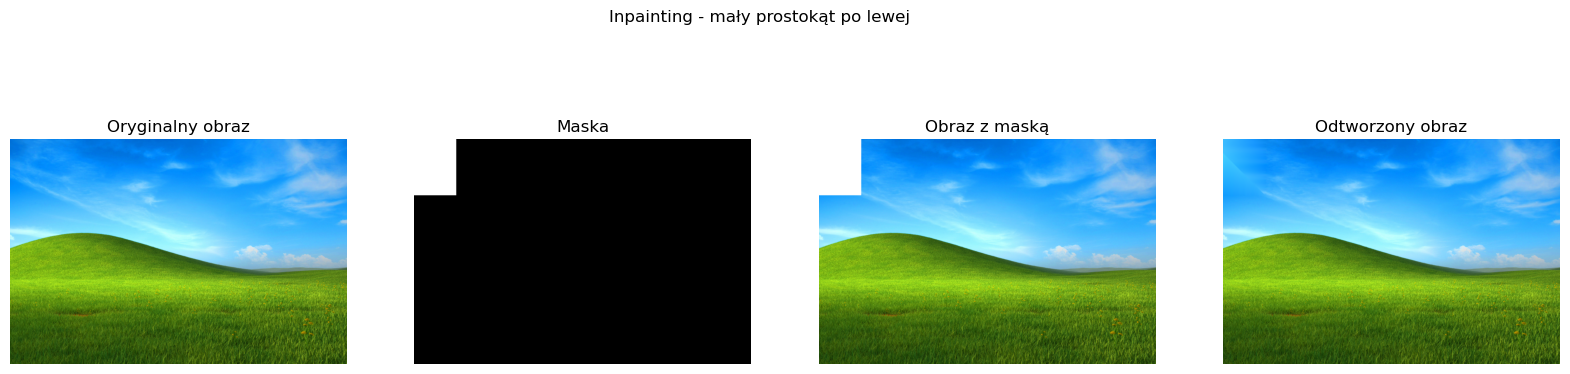

In [75]:
small_rectangle_mask_on_the_side = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(small_rectangle_mask_on_the_side, (0, 0), (mask_size[0] // 2, mask_size[1]), 255, -1)

inpaint = ordinary_inpainting(original_image, small_rectangle_mask_on_the_side)
display_images(original_image, small_rectangle_mask_on_the_side, inpaint, "Inpainting - mały prostokąt po lewej")

### Zadanie: Implementacja prostego algorytmu inpaintingu
Twoim zadaniem jest zaimplementowanie własnego, prostego algorytmu do rekonstrukcji brakujących fragmentów obrazu. 
W tym ćwiczeniu skoncentrujesz się na uzupełnianiu brakujących obszarów przy użyciu techniki interpolacji sąsiadujących pikseli.

Szczegóły:
1. Wczytaj obraz oraz maskę wskazującą brakujące obszary.
2. Zaimplementuj prosty algorytm inpaintingu:
3. Dla każdego piksela w brakującym obszarze (oznaczonym przez maskę):
4. Zamień wartość piksela na średnią wartość jego sąsiednich pikseli, które nie są częścią maski.
5. Wyświetl wynik na podstawie wypełnionych braków.

Kod początkowy:

In [78]:
def simple_inpaint(image, mask):
    """
    Prosty algorytm inpaintingu: zastąp brakujące piksele średnią sąsiednich pikseli.
    """
    result = image.copy()


    return result

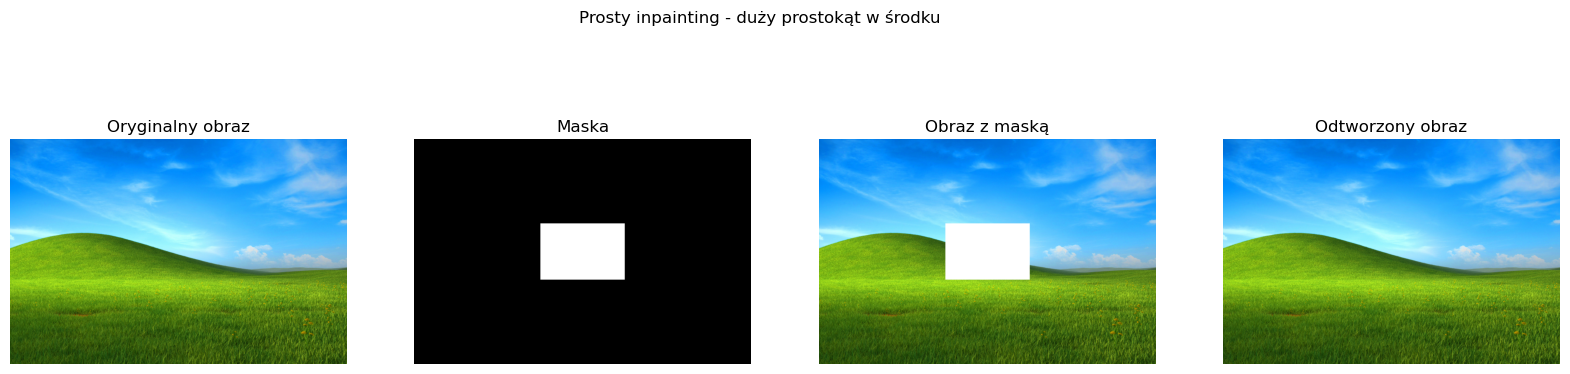

In [77]:
simple_inpainting = simple_inpaint(original_image, big_rectangle_mask_in_the_middle)
display_images(original_image, big_rectangle_mask_in_the_middle, simple_inpainting, "Prosty inpainting - duży prostokąt w środku")

## Literatura
1. [What is Generative AI] (https://www.nvidia.com/en-us/glossary/generative-ai/#:~:text=Generative%20AI%20models%20can%20take,or%20turn%20video%20into%20text.)
2. [Generative Adversarial Networks] (Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio. Generative Adversarial Networks. arXiv:1406.2661)
3. [Variational Autoencoders] (Diederik P. Kingma, Max Welling. Auto-Encoding Variational Bayes. arXiv:1312.6114) 
4. [Variational Autoencoders] (Diederik P. Kingma, Max Welling. An Introduction to Variational Autoencoders. arXiv:1906.02691)
5. [Diffusion Models] (Ling Yang, Zhilong Zhang, Yang Song, Shenda Hong, Runsheng Xu, Yue Zhao, Wentao Zhang, Bin Cui, Ming-Hsuan Yang. Diffusion Models: A Comprehensive Survey of Methods and Applications. arXiv:2209.00796)